In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

C:\Users\Yuta\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
v_spec = np.load("ventricle_spectrum.npy")
a_spec = np.load("article_spectrum.npy")

In [3]:
# choose randomly from v_spec 
N = a_spec.shape[0]
choice = np.random.choice(v_spec.shape[0], N)
v_spec_random = v_spec[choice]
len(v_spec_random)

71

In [5]:
# create dataset and labels(v: 0, a:1)
data = np.vstack((v_spec_random,a_spec))
label = np.array([0] * N + [1] * N)

In [6]:
train_data, test_data,train_label, test_label = train_test_split(data, label)

In [7]:
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)


In [17]:
n_feature = 2000
# linear regression
regr = LinearRegression()
regr.fit(scaled_train_data[:,: n_feature], train_label)
label_pred = regr.predict(scaled_test_data[:, :n_feature])
regr.score(scaled_test_data[:, :n_feature], test_label)

-4.5060420818237805

In [18]:
clf = LogisticRegression()
clf.fit(scaled_train_data[:,: n_feature], train_label)
clf.score(scaled_test_data[:,: n_feature], test_label)

0.66666666666666663

In [11]:
def logistic(n_feature):
    """return accuracy score for n_feature"""
    clf = LogisticRegression()
    clf.fit(scaled_train_data[:,: n_feature], train_label)
    return clf.score(scaled_test_data[:,: n_feature], test_label)

In [15]:
score = []
for i in range(1, 2000):
    score.append(logistic(i))
    if i % 100 == 0:
        print("number of feature:{0:4d}".format(i))

number of feature: 100
number of feature: 200
number of feature: 300
number of feature: 400
number of feature: 500
number of feature: 600
number of feature: 700
number of feature: 800
number of feature: 900
number of feature:1000
number of feature:1100
number of feature:1200
number of feature:1300
number of feature:1400
number of feature:1500
number of feature:1600
number of feature:1700
number of feature:1800
number of feature:1900


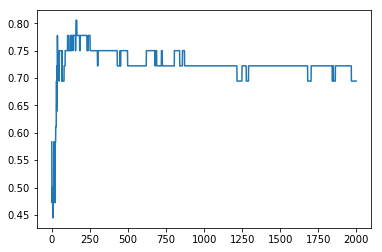

In [14]:
plt.plot(score)
plt.show()

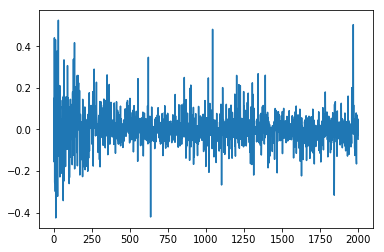

In [19]:
plt.plot(clf.coef_[0])

In [26]:
for i in range(2000):
    if i % 50 == 0:
        print("the number:{0:04s}".format(str(i)))

ValueError: '=' alignment not allowed in string format specifier